# Optimal Spanish Keyboard

This project aimed to design optimized keyboard layouts for Spanish speakers by analyzing a billion-word Spanish text corpus. Using TF-IDF and Genetic Algorithms, data was cleaned and processed to calculate term frequencies and character importance, optimizing key placement to minimize typing effort. The Genetic Algorithm iteratively refined layouts for maximum efficiency. The new layouts demonstrated significant improvements in typing speed and reduced finger movement compared to the traditional QWERTY layout, enhancing comfort and efficiency for Spanish typists. The complete report detailing the methodologies and findings is provided below.

## Final Report

In [53]:
from IPython.display import IFrame, Image
IFrame("../_static/Optimal Spanish Keyboard.pdf", width=790, height=1000)

## Appendix

### TF-IDF

In [15]:
import pandas as pd
import numpy as np
import math
from collections import Counter

In [16]:
characters = [chr(i) for i in range(97, 111)] + ['ñ'] + [chr(i) for i in range(111, 123)] + ['.', ',', '´']  # a-m, ñ, n-z, ., ,, ´

df = pd.read_csv('spanish_billion_words10000.csv')
for i in range(len(df)):
  df.loc[i,'text'] = df.loc[i,'text']+'.'

In [17]:
df

,text
0,Source Wikisource librodot com SENTIDO Y SENSI...
1,La familia Dashwood llevaba largo tiempo afinc...
2,Su propiedad era de buen tamaño y en el centro...
3,El último dueño de esta propiedad había sido u...
4,Pero la muerte de ella ocurrida diez años ante...
...,...
9995,Ha conocido usted a alguien así Ha amado a alg...
9996,Amo ahora a una persona así.
9997,Pero antes que a mí no ha amado a nadie que en...
9998,Jane nunca he hallado a nadie como tú.


#### Term Frequencies

In [18]:
tf_df = pd.DataFrame(index=characters, columns=range(len(df))).fillna(0)

In [19]:
def split_accent(sentence):
    accents_mapping = {
        'á': '´a',
        'é': '´e',
        'í': '´i',
        'ó': '´o',
        'ú': '´u',}

    for accented_char, replacement in accents_mapping.items():
        sentence = sentence.replace(accented_char, replacement)
        sentence = ''.join(sentence.lower())

    return sentence

In [20]:
def count_chars(sentence):
    sentence = split_accent(sentence).replace(' ', '')
    counts = {char: sentence.count(char) for char in set(sentence)}
    return counts

In [21]:
for j, sentence in enumerate(df['text']):
    char_counts = count_chars(sentence)
    for char, count in char_counts.items():
        if char in characters:
            tf_df.loc[char, j] = count

In [22]:
tf_df.columns = [f'Doc{i}' for i in range(1, len(df) + 1)]

#### Inverse Document Frequencies

In [23]:
N = len(df)
idf_series = pd.Series(index=characters, dtype=float)

for char in characters:
    n_t = sum(tf_df.loc[char, :] > 0)
    idf_series[char] = math.log((N + 1) / (n_t + 1)) + 1

#### TF-IDF Matrix

In [24]:
tf_idf_matrix = tf_df.mul(idf_series, axis=0)

In [25]:
tf_idf_matrix

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10,...,Doc9991,Doc9992,Doc9993,Doc9994,Doc9995,Doc9996,Doc9997,Doc9998,Doc9999,Doc10000
a,4.053957,10.134892,24.323742,25.337231,11.148382,22.296763,14.188849,2.026978,26.350720,8.107914,...,11.148382,17.229317,1.013489,18.242806,13.175360,11.148382,7.094425,12.161871,6.080935,6.080935
b,2.787767,1.393884,4.181651,2.787767,0.000000,2.787767,6.969418,0.000000,4.181651,0.000000,...,2.787767,1.393884,0.000000,2.787767,1.393884,0.000000,0.000000,0.000000,0.000000,0.000000
c,4.552853,1.138213,7.967493,4.552853,2.276427,4.552853,5.691066,3.414640,7.967493,1.138213,...,2.276427,9.105706,2.276427,10.243920,6.829280,2.276427,0.000000,3.414640,2.276427,3.414640
d,4.443679,3.332759,15.552878,12.220118,5.554599,9.998278,4.443679,2.221840,18.885637,4.443679,...,4.443679,7.776439,1.110920,11.109198,7.776439,5.554599,0.000000,4.443679,2.221840,5.554599
e,6.019229,4.012819,28.089735,20.064096,12.038458,21.067301,9.028843,7.022434,32.102554,9.028843,...,9.028843,19.060891,2.006410,20.064096,23.073711,6.019229,1.003205,8.025638,3.009614,8.025638
f,0.000000,3.919641,0.000000,1.959820,0.000000,3.919641,1.959820,1.959820,1.959820,0.000000,...,0.000000,1.959820,0.000000,0.000000,7.839281,1.959820,0.000000,1.959820,0.000000,1.959820
g,0.000000,1.590871,7.954356,1.590871,3.181742,1.590871,0.000000,1.590871,1.590871,0.000000,...,3.181742,1.590871,0.000000,3.181742,3.181742,3.181742,0.000000,0.000000,0.000000,0.000000
h,0.000000,1.547763,3.095525,4.643288,1.547763,4.643288,1.547763,0.000000,4.643288,6.191050,...,1.547763,1.547763,1.547763,0.000000,0.000000,3.095525,1.547763,1.547763,3.095525,7.738813
i,9.485305,4.215691,9.485305,7.377460,3.161768,13.700996,7.377460,2.107846,14.754919,6.323537,...,4.215691,7.377460,1.053923,7.377460,8.431382,4.215691,1.053923,6.323537,1.053923,5.269614
j,2.087476,0.000000,2.087476,0.000000,2.087476,2.087476,2.087476,0.000000,0.000000,4.174951,...,0.000000,2.087476,0.000000,2.087476,4.174951,0.000000,0.000000,0.000000,2.087476,0.000000


#### Character importance

In [26]:
character_importance = pd.DataFrame(tf_idf_matrix.sum(axis=1)).sort_values(by = 0, ascending = False)
character_importance

,0
e,125113.684669
a,123670.010060
o,85747.972952
s,70315.375394
n,70066.128126
r,65436.159548
i,63412.427133
d,50752.372438
l,50629.875175
u,46503.212775


#### Most common bigrams

In [27]:
documents = [split_accent(df.loc[i,'text']).split(' ')for i in range(len(df))]
documents = [item for sublist in documents for item in sublist]

In [55]:
def find_bigrams(text):
    bigrams = zip(text, text[1:])
    return bigrams

bigram_counts = Counter()

for doc in documents:
    bigram_counts.update(find_bigrams(doc))

most_common_bigrams = bigram_counts.most_common()

bigrams = []
for bigram, count in most_common_bigrams:
    bigrams.append((bigram[0]+bigram[1], count))

bigrams

[('en', 20152),
 ('de', 17216),
 ('es', 15908),
 ('er', 15471),
 ('la', 13518),
 ('ra', 13518),
 ('ue', 13187),
 ('ar', 12702),
 ('as', 12579),
 ('on', 11833),
 ('an', 11712),
 ('qu', 11321),
 ('nt', 11267),
 ('os', 10082),
 ('ta', 9948),
 ('co', 9851),
 ('ia', 9803),
 ('do', 9773),
 ('re', 9729),
 ('or', 9545),
 ('se', 9495),
 ('el', 9315),
 ('te', 9285),
 ('´i', 8489),
 ('ad', 8312),
 ('un', 7664),
 ('st', 7577),
 ('ab', 7569),
 ('to', 7471),
 ('no', 7274),
 ('da', 7174),
 ('in', 7110),
 ('me', 6984),
 ('ci', 6923),
 ('al', 6760),
 ('na', 6555),
 ('´o', 6468),
 ('le', 6436),
 ('lo', 6386),
 ('ie', 6299),
 ('ro', 6244),
 ('su', 5611),
 ('si', 5515),
 ('ha', 5425),
 ('ma', 5364),
 ('po', 5302),
 ('ca', 5202),
 ('mi', 5053),
 ('ri', 4838),
 ('pa', 4771),
 ('sa', 4759),
 ('pe', 4739),
 ('id', 4550),
 ('nd', 4501),
 ('ec', 4483),
 ('ba', 4368),
 ('di', 4362),
 ('tr', 4247),
 ('ac', 4009),
 ('om', 3998),
 ('ti', 3887),
 ('mo', 3858),
 ('´a', 3824),
 ('ll', 3813),
 ('´e', 3695),
 ('ne', 367

### Genetic Algorithm

#### Data Preprocessing


In [ ]:
import csv
import random
from itertools import permutations
import matplotlib.pyplot as plt
import random
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
key_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '.', ',', '´', 'ñ']
effort_list = [3.5, 2.4, 2.0, 2.2, 3.4, 3.8, 2.2, 2.0, 2.4, 3.5, 1.5, 1.2, 1.0, 1.0, 2.9, 2.9, 1.0, 1.0, 1.2, 1.5, 3.5, 2.8, 2.5, 1.7, 2.6, 2.6, 1.7, 2.5, 2.8, 3.5]

accented_char_map = {
    'á': '´a',
    'é': '´e',
    'í': '´i',
    'ó': '´o',
    'ú': '´u'}

#### Import Data

In [ ]:
text_list = []

with open('spanish_billion_words1000.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
    text = lines[0]
    for accented_char, replacement in accented_char_map.items():
      text = text.replace(accented_char, replacement)
    text_list.append(text.lower() + ".")

text_list = text_list[1:]

#### Genetic Algorithm implementation - auxiliary functions

In [ ]:
def fitness(data, layout):
    total_effort = 0
    for sentence in data:
        for char in sentence:
            if char in layout.keys():
                total_effort += layout[char]
    return total_effort

In [ ]:
def create_population(population_size, key_list, effort_list):
    population = []
    for _ in range(population_size):
        newdict = {}
        shuffled_efforts = random.sample(effort_list, len(effort_list))  # Shuffle efforts
        for key, effort in zip(key_list, shuffled_efforts):
            newdict[key] = effort
        population.append(newdict)
    return population

In [ ]:
## Randomly chooses layouts
def tournament_selection(population, tournament_size, data):
    selected = []
    for _ in range(len(population)):
        # Ensure that tournament size is not larger than the population size
        actual_tournament_size = min(tournament_size, len(population))
        participants = random.sample(population, actual_tournament_size)
        winner = min(participants, key=lambda x: fitness(data, x))
        selected.append(winner)
    return selected

In [ ]:
## Randomly choose a point to split and then merge two different keyboard layouts, results in two children that are mixes of the parents.
def crossover(parent1, parent2):
    keys = list(parent1.keys())
    random.shuffle(keys)  # Shuffle keys

    # Inherit efforts from both parents randomly
    half = len(keys) // 2
    offspring = {key: (parent1[key] if i < half else parent2[key]) for i, key in enumerate(keys)}

    # Calculate the effort frequencies from parents
    effort_counts = {effort: list(parent1.values()).count(effort) for effort in set(parent1.values())}
    # Get the current efforts in the child
    current_counts = {effort: list(offspring.values()).count(effort) for effort in effort_counts}

    # Identify surplus and deficit efforts
    surplus = [(effort, current_counts[effort] - count) for effort, count in effort_counts.items() if current_counts[effort] > count]
    deficit = [(effort, count - current_counts[effort]) for effort, count in effort_counts.items() if current_counts[effort] < count]

    # Create mappings
    surplus_dict = {effort: over for effort, over in surplus}
    deficit_dict = {effort: under for effort, under in deficit}

    # Fix distribution in child
    for key, effort in offspring.items():
        if effort in surplus_dict and surplus_dict[effort] > 0:
            for def_effort, def_count in deficit:
                if def_count > 0:
                    # Replace one surplus effort with one in deficit
                    offspring[key] = def_effort
                    surplus_dict[effort] -= 1
                    deficit_dict[def_effort] -= 1
                    # Update the deficit list to reflect the decrement
                    deficit = [(eff, cnt-1) if eff == def_effort else (eff, cnt) for eff, cnt in deficit]
                    break  # Move to the next key-effort pair needing correction

    return offspring

In [ ]:
#Randomly swaps two positions in order to maintain genetic diversity and prevent premature convergence
def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        keys = list(individual.keys())
        point1, point2 = random.sample(range(len(keys)), 2)
        # Swapping the efforts associated with two keys
        individual[keys[point1]], individual[keys[point2]] = individual[keys[point2]], individual[keys[point1]]
    return individual

In [ ]:
def fit(population_size, generations, mutation_rate, crossover_rate, selection_pressure, plot_effort=False):
    tournament_size = round(0.07 * population_size)
    population = create_population(population_size, key_list, effort_list)
    
    best_fitness_over_generations = []

    best_global_individual = None
    best_global_fitness = float('inf')

    for generation in range(generations):
        selected = tournament_selection(population, tournament_size, text_list)
        offspring = []

        for i in range(0, len(selected) - 1, 2):
            if random.random() < crossover_rate:
                child = crossover(selected[i], selected[i+1])
                offspring.append(child)
            else:
                offspring.extend([selected[i], selected[i+1]])
        if len(selected) % 2 == 1:
            offspring.append(selected[-1].copy())

        for individual in offspring:
            mutate(individual, mutation_rate)

        population = offspring

        # Track the best individual for this generation
        current_generation_fitness = [(individual, fitness(text_list, individual)) for individual in population]
        best_individual, best_fitness = min(current_generation_fitness, key=lambda x: x[1])

        # Compare with the global best and update if this generation's best is better
        if best_fitness < best_global_fitness:
            best_global_individual = best_individual
            best_global_fitness = best_fitness

        # Only track the best fitness for each generation
        best_fitness_over_generations.append(best_fitness/len(text_list))

    # Plot the results after all generations are completed if plot_effort is True
    if plot_effort:
        generations = range(1, len(best_fitness_over_generations) + 1)
        plt.figure(figsize=(10, 5))
        plt.plot(generations, best_fitness_over_generations, marker='o', label='Best Fitness per Generation')
        plt.xlabel('Generation')
        plt.ylabel('Best Fitness')
        plt.title('Best Fitness Evolution Over Generations')
        plt.legend()
        plt.show()

    # Return the global best individual and its fitness
    return best_global_individual, -best_global_fitness / len(text_list), best_fitness_over_generations

In [ ]:
def print_layout(best_individual):
    print("Best Layout:")
    for key, effort in sorted(best_individual.items(), key=lambda item: item[1]):
        print(f"{key}: {effort}")

In [ ]:
population_size = 100
generations = 100
mutation_rate = 0.05
crossover_rate = 0.7
selection_pressure = 0.2
tournament_size = round(0.07 * population_size) #common practice is to use small fraction of population size (7% being used)
random.seed(40)

a, b, c = fit(population_size, generations, mutation_rate, crossover_rate, selection_pressure)

print_layout(a)
print(-b)

Best Layout:
i: 1.0
g: 1.0
o: 1.0
e: 1.0
r: 1.2
´: 1.2
a: 1.5
l: 1.5
d: 1.7
s: 1.7
b: 2.0
y: 2.0
z: 2.2
n: 2.2
p: 2.4
.: 2.4
h: 2.5
u: 2.5
m: 2.6
j: 2.6
q: 2.8
c: 2.8
t: 2.9
f: 2.9
ñ: 3.4
w: 3.5
v: 3.5
k: 3.5
x: 3.5
,: 3.8
201.01600000005197


#### Class GeneticAlgorithmOptimizer for grid search (hyper parameter tuning)

In [ ]:
class GeneticAlgorithmOptimizer(BaseEstimator):
    def __init__(self, population_size=100, generations=100, mutation_rate=0.05, crossover_rate=0.7, selection_pressure=0.2):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.selection_pressure = selection_pressure

    def fit(self, X, y=None):
        random.seed(40)
        self.best_layout_, self.best_score_, self.best_fitness_ver_gen = fit(
            self.population_size,
            self.generations,
            self.mutation_rate,
            self.crossover_rate,
            self.selection_pressure,
        )
        return self

    def score(self, X, y=None):
        return self.best_score_

In [40]:
random.seed(40)
x, y, z = fit(crossover_rate= 0.8, generations= 50, mutation_rate= 0.05, population_size= 150, selection_pressure= 0.2, plot_effort = False)

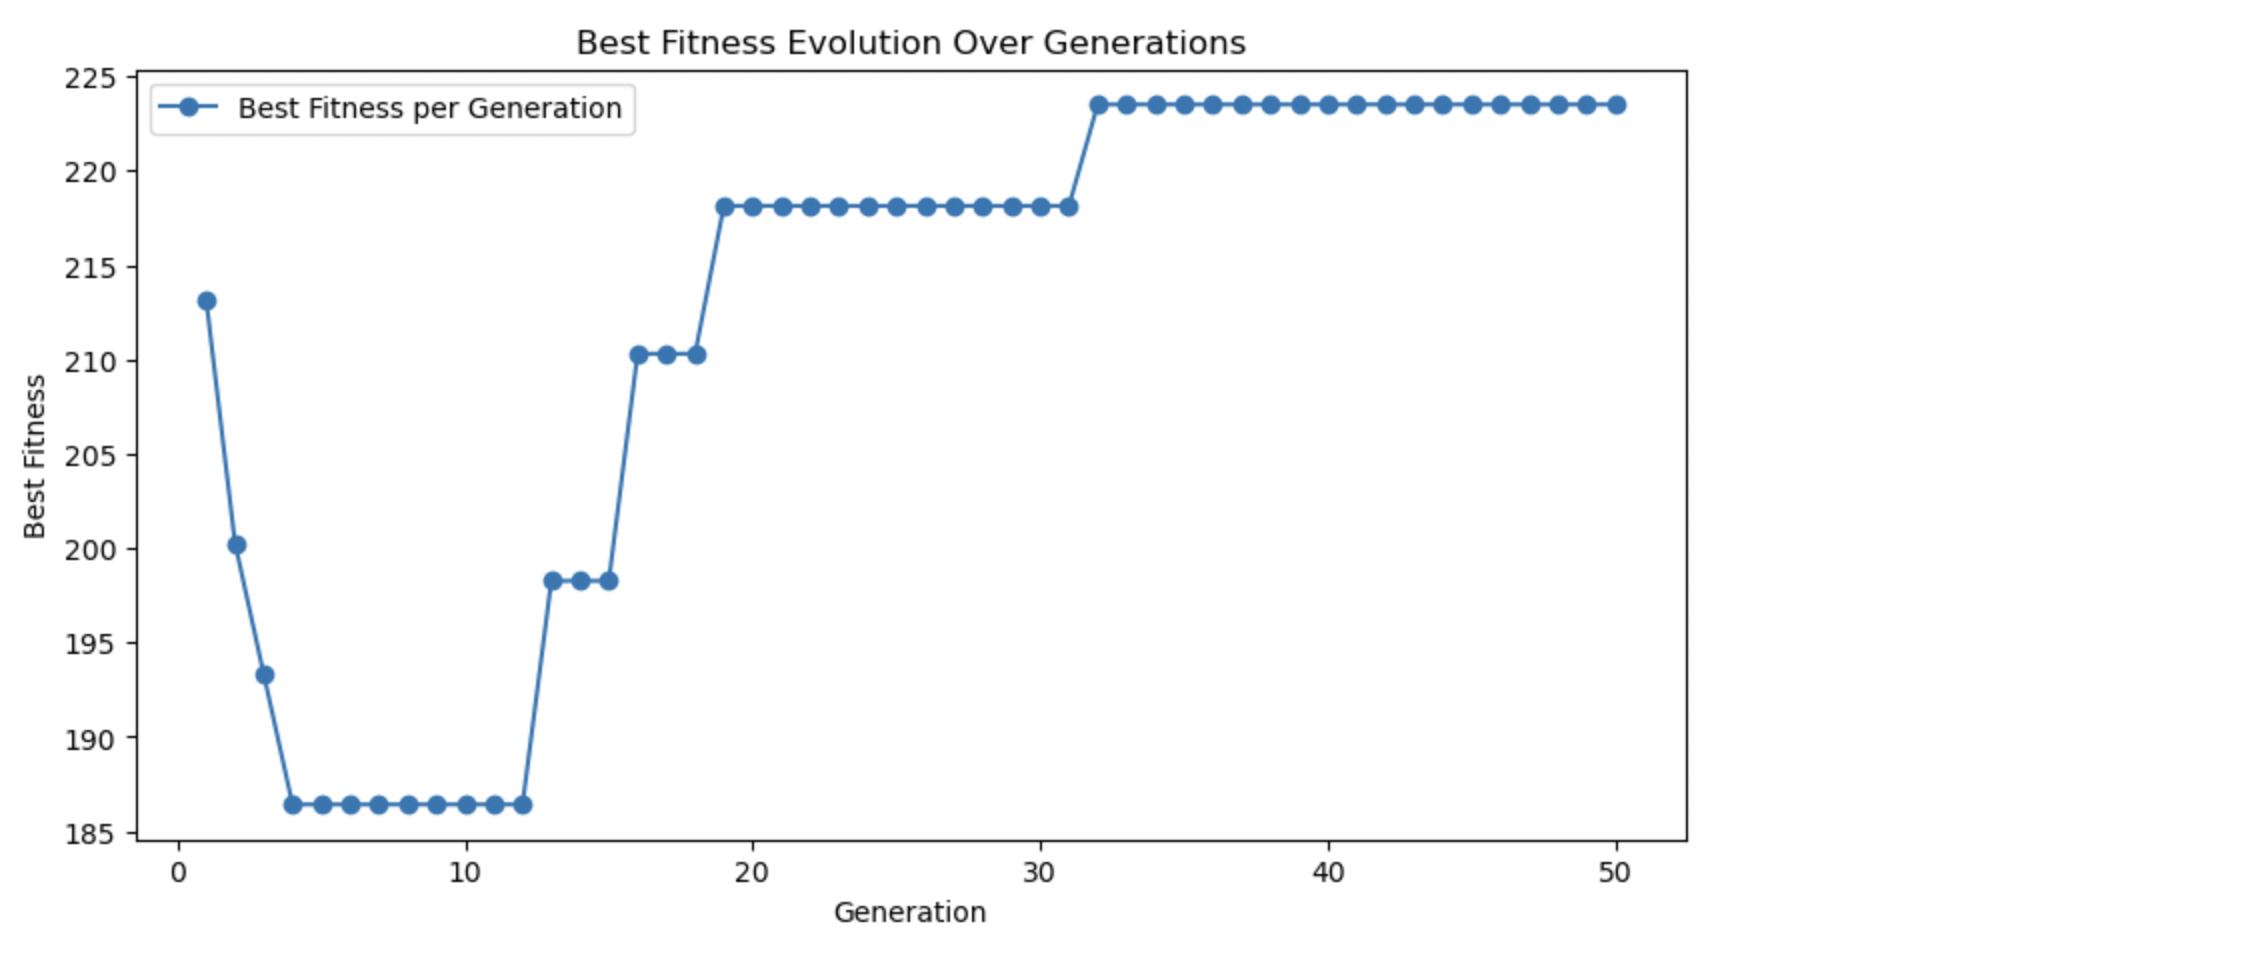

In [48]:
Image('plot_effort.png', width = 100)

In [38]:
print_layout(x)
print('\n' + f'{-y}')
print('\n' + f'{z}')

Best Layout:
s: 1.0
o: 1.0
e: 1.0
l: 1.0
n: 1.2
a: 1.2
i: 1.5
t: 1.5
d: 1.7
r: 1.7
c: 2.0
m: 2.0
k: 2.2
b: 2.2
u: 2.4
z: 2.4
ñ: 2.5
.: 2.5
,: 2.6
h: 2.6
q: 2.8
´: 2.8
g: 2.9
j: 2.9
p: 3.4
v: 3.5
y: 3.5
f: 3.5
x: 3.5
w: 3.8

186.42330000003534

[213.1548000000986, 200.27620000009267, 193.31600000004843, 186.42330000003534, 186.42330000003534, 186.42330000003534, 186.42330000003534, 186.42330000003534, 186.42330000003534, 186.42330000003534, 186.42330000003534, 186.42330000003534, 198.27010000006243, 198.27010000006243, 198.27010000006243, 210.30310000005366, 210.30310000005366, 210.30310000005366, 218.14060000005986, 218.14060000005986, 218.14060000005986, 218.14060000005986, 218.14060000005986, 218.14060000005986, 218.14060000005986, 218.14060000005986, 218.14060000005986, 218.14060000005986, 218.14060000005986, 218.14060000005986, 218.14060000005986, 223.5136000000641, 223.5136000000641, 223.5136000000641, 223.5136000000641, 223.5136000000641, 223.5136000000641, 223.5136000000641, 223